__Question 1.__ There are 5 jurors in a courtroom. Each of them can correctly identify the guilt of the defendant with 70% probability, independent of one another. What is the probability that the jurors will jointly reach the correct verdict if the final decision is by majority vote?
- 70.00%
- 83.20%
- __83.70%__
- 87.50%

In [11]:
import math 
prob = 0.7

all_prob = (prob**5)*((1-prob)**0)*math.comb(5,5) + \
(prob**4)*((1-prob)**1)*math.comb(5,4) + (prob**3)*((1-prob)**2)*math.comb(5,3)

print(round(all_prob*1000)/10, "%")

83.7 %


In [72]:
# Disable warnings in Anaconda
import warnings

warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [13]:
from matplotlib import rcParams

rcParams["figure.figsize"] = 11, 8

In [40]:
def fill_nan(table):
    for col in table.columns:
        table[col] = table[col].fillna(table[col].median())
    return table

In [15]:
# for Jupyter-book, we copy data from GitHub, locally, to save Internet traffic,
# you can specify the data/ folder from the root of your cloned
# https://github.com/Yorko/mlcourse.ai repo, to save Internet traffic
DATA_PATH = "https://raw.githubusercontent.com/Yorko/mlcourse.ai/master/data/"

In [41]:
data = pd.read_csv(DATA_PATH + "credit_scoring_sample.csv", sep=";")
data.head()

,SeriousDlqin2yrs,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse,MonthlyIncome,NumberOfDependents
0,0,64,0,0.249908,0,0,8158.0,0.0
1,0,58,0,3870.000000,0,0,NaN,0.0
2,0,41,0,0.456127,0,0,6666.0,0.0
3,0,43,0,0.000190,0,0,10500.0,2.0
4,1,49,0,0.271820,0,0,400.0,0.0


In [18]:
#Общие ежемесячные платежи по кредиту (кредит, алименты и т.д.) / Общий процент ежемесячного дохода
data.DebtRatio.mean()

352.0626881071408

In [21]:
#Количество случаев, когда клиент просрочил 30-59 дней (не хуже) по другим кредитам за последние 2 года
data["NumberOfTime30-59DaysPastDueNotWorse"].mean()

0.7509930541686084

In [23]:
#Количество случаев, когда клиент просрочил 60-89 дней (не хуже) по другим кредитам за последние 2 года
data["NumberOfTime60-89DaysPastDueNotWorse"].mean()

0.5058695603932273

In [24]:
#Количество случаев, когда у клиента была просрочка более чем на 90 дней по другим кредитам
data.NumberOfTimes90DaysLate.mean()

0.5707121141512993

In [25]:
#Количество иждивенцев клиента
data.NumberOfDependents.mean()

0.7896281800391389

In [26]:
#Клиент не погасил задолженность по кредиту в течение 90 дней
data["SeriousDlqin2yrs"].mean()

0.2224885160774915

In [28]:
data.dtypes

SeriousDlqin2yrs                          int64
age                                       int64
NumberOfTime30-59DaysPastDueNotWorse      int64
DebtRatio                               float64
NumberOfTimes90DaysLate                   int64
NumberOfTime60-89DaysPastDueNotWorse      int64
MonthlyIncome                           float64
NumberOfDependents                      float64
dtype: object

Distribution of the target:


0    0.777511
1    0.222489
Name: SeriousDlqin2yrs, dtype: float64

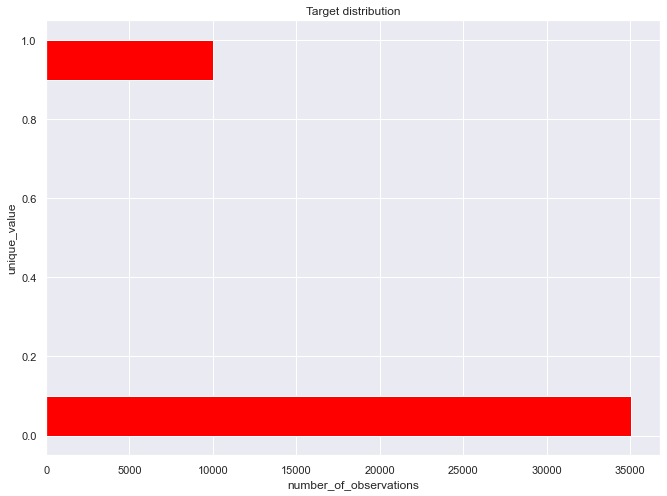

In [29]:
ax = data["SeriousDlqin2yrs"].hist(orientation="horizontal", color="red")
ax.set_xlabel("number_of_observations")
ax.set_ylabel("unique_value")
ax.set_title("Target distribution")

print("Distribution of the target:")
data["SeriousDlqin2yrs"].value_counts() / data.shape[0]

In [44]:
independent_columns_names = [x for x in data if x != "SeriousDlqin2yrs"]
independent_columns_names

['age',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'DebtRatio',
 'NumberOfTimes90DaysLate',
 'NumberOfTime60-89DaysPastDueNotWorse',
 'MonthlyIncome',
 'NumberOfDependents']

In [42]:
table = fill_nan(data)

In [43]:
X = table[independent_columns_names]
y = table["SeriousDlqin2yrs"]

In [39]:
data[data["MonthlyIncome"]==-1]["SeriousDlqin2yrs"].mean()

0.19310424621080644

__Question 2.__ Make an interval estimate of the average age for the customers who delayed repayment at the 90% confidence level. Use the example from the article as reference, if needed. Also, use np.random.seed(0) as before. What is the resulting interval estimate?

- 52.59 – 52.86
- __45.71 – 46.13__
- 45.68 – 46.17
- 52.56 – 52.88

In [48]:
def get_bootstrap_samples(data, n_samples):
    # функция для генерации подвыборок с помощью бутстрэпа
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples
def stat_intervals(stat, alpha):
    # функция для интервальной оценки
    boundaries = np.percentile(stat, [100 * alpha / 2, 100 * (1 - alpha / 2)])
    return boundaries


In [54]:
np.random.seed(0)
stat_intervals(data[data.SeriousDlqin2yrs == 1].age.values, 0.1)

array([27., 68.])

In [52]:

# Save the ages of those who let a delay
churn = data[data["SeriousDlqin2yrs"] == 1]["age"].values

# Set the random seed for reproducibility
np.random.seed(0)

# Generate bootstrap samples and calculate the mean for each sample
churn_mean_scores = [np.mean(sample) for sample in get_bootstrap_samples(churn, 1000)]

# Print the interval estimate for the sample means
print("Mean interval", stat_intervals(churn_mean_scores, 0.1))

Mean interval [45.71379414 46.12700479]


In [57]:
np.random.seed(0)
samples_age_score = [sample.mean() for sample in get_bootstrap_samples(churn, 1000)]
print("Mean interval", stat_intervals(samples_age_score, 0.1))

Mean interval [45.71379414 46.12700479]


In [64]:
len(samples_age_score)

1000

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [66]:
lr = LogisticRegression(random_state=5, class_weight="balanced")

In [67]:
parameters = {"C": (0.0001, 0.001, 0.01, 0.1, 1, 10)}

In [68]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)

__Question 3.__ Perform a Grid Search with the scoring metric “roc_auc” for the parameter C. Which value of the parameter C is optimal?

- 0.0001
- __0.001__
- 0.01
- 0.1
- 1
- 10


In [73]:
grid_search = GridSearchCV(lr, parameters, scoring="roc_auc", n_jobs=-1, cv=skf)
grid_search = grid_search.fit(X,y)
grid_search.best_params_

/Users/aleksashka/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/aleksashka/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

{'C': 0.001}

__Question 4.__ Can we consider the best model stable? The model is stable if the standard deviation on validation is less than 0.5%. Save the ROC AUC value of the best model; it will be useful for the following tasks.

- Yes
- __No__

In [79]:
print("std  = ", round(grid_search.cv_results_["std_test_score"].mean()*100000)/1000, "%")

std  =  0.685 %


The ROC AUC value of the best model:

In [80]:
grid_search.best_score_

0.8089120626797153

__Question 5.__ Feature importance is defined by the absolute value of its corresponding coefficient. First, you need to normalize all of the feature values so that it will be valid to compare them. What is the most important feature for the best logistic regression model?

- age
- __NumberOfTime30-59DaysPastDueNotWorse__
- DebtRatio
- NumberOfTimes90DaysLate
- NumberOfTime60-89DaysPastDueNotWorse
- MonthlyIncome
- NumberOfDependents

In [105]:
from sklearn.preprocessing import StandardScaler
lr = LogisticRegression(C=0.001, random_state=5, class_weight="balanced")
scal = StandardScaler()
lr.fit(scal.fit_transform(X), y)

pd.DataFrame(
    {"feat": independent_columns_names, "coef": lr.coef_.flatten().tolist(), 
     "percent":np.exp(lr.coef_[0])/np.sum(np.exp(lr.coef_[0]))*100}
).sort_values(by="coef", ascending=False)

,feat,coef,percent
1,NumberOfTime30-59DaysPastDueNotWorse,0.723427,24.129794
3,NumberOfTimes90DaysLate,0.516788,19.625073
4,NumberOfTime60-89DaysPastDueNotWorse,0.193558,14.204772
6,NumberOfDependents,0.101443,12.954763
2,DebtRatio,-0.024096,11.426375
5,MonthlyIncome,-0.163146,9.943052
0,age,-0.416702,7.716170


In [86]:
lr.coef_.flatten().tolist()

[-0.4167022938992682,
 0.7234269813289953,
 -0.0240960522475107,
 0.5167876396300686,
 0.1935576371756853,
 -0.16314631733039303,
 0.10144319526520433]

__Question 6.__ Calculate how much DebtRatio affects our prediction using the softmax function. What is its value?

- 0.38
- -0.02
- __0.11__
- 0.24

In [102]:
(np.exp(lr.coef_[0][2]) / np.sum(np.exp(lr.coef_[0])))

0.1142637528306527

In [92]:
lr.coef_[0][2]

-0.0240960522475107

In [96]:
lr.coef_[0]

array([-0.41670229,  0.72342698, -0.02409605,  0.51678764,  0.19355764,
       -0.16314632,  0.1014432 ])

In [97]:
np.exp(lr.coef_[0])

array([0.65921714, 2.06148579, 0.97619194, 1.67663304, 1.21355933,
       0.84946689, 1.10676705])

In [99]:
np.exp(-0.41670229)

0.6592171462700177

In [100]:
np.sum(np.exp(lr.coef_[0]))

8.543321181403357

In [101]:
np.exp(lr.coef_[0])/np.sum(np.exp(lr.coef_[0]))

array([0.0771617 , 0.24129794, 0.11426375, 0.19625073, 0.14204772,
       0.09943052, 0.12954763])

__Question 7.__ Let’s see how we can interpret the impact of our features. For this, recalculate the logistic regression with absolute values, that is without scaling. Next, modify the customer’s age by adding 20 years, keeping the other features unchanged. How many times will the chance that the customer will not repay their debt increase? You can find an example of the theoretical calculation here.

- -0.01
- __0.70__
- 8.32
- 0.66

In [110]:
scal.fit_transform(X)[0:5][2]

array([-0.69692794, -0.12143243, -0.14249339, -0.09245239, -0.08220789,
        0.04048588, -0.68545299])

In [129]:
lr = LogisticRegression(C=0.001, random_state=5, class_weight="balanced")
lr.fit(X, y)

pd.DataFrame(
    {"feat": independent_columns_names, "coef": lr.coef_.flatten().tolist(),
    "percent":np.exp(lr.coef_[0])/np.sum(np.exp(lr.coef_[0]))*100}
).sort_values(by="coef", ascending=False)

,feat,coef,percent
1,NumberOfTime30-59DaysPastDueNotWorse,0.477648,18.938319
3,NumberOfTimes90DaysLate,0.419586,17.870034
4,NumberOfTime60-89DaysPastDueNotWorse,0.225008,14.710291
6,NumberOfDependents,0.131974,13.403465
5,MonthlyIncome,-0.000010,11.746191
2,DebtRatio,-0.000028,11.745985
0,age,-0.013766,11.585716


In [130]:
np.exp(lr.coef_[0][0] *20)

0.75932531536672

In [118]:
X.age = X.age+20
lr = LogisticRegression(C=0.001, random_state=5, class_weight="balanced")
lr.fit(X, y)

pd.DataFrame(
    {"feat": independent_columns_names, "coef": lr.coef_.flatten().tolist(),
    "percent":np.exp(lr.coef_[0])/np.sum(np.exp(lr.coef_[0]))*100}
).sort_values(by="coef", ascending=False)

,feat,coef,percent
1,NumberOfTime30-59DaysPastDueNotWorse,0.443701,18.336592
3,NumberOfTimes90DaysLate,0.391997,17.412595
4,NumberOfTime60-89DaysPastDueNotWorse,0.232903,14.851493
6,NumberOfDependents,0.188607,14.207983
2,DebtRatio,-0.000010,11.765691
5,MonthlyIncome,-0.000013,11.765645
0,age,-0.009033,11.660000


In [121]:
X.age

0        64
1        58
2        41
3        43
4        49
         ..
45058    31
45059    49
45060    38
45061    47
45062    45
Name: age, Length: 45063, dtype: int64

![title](qq.png)

In [131]:
np.exp(lr.coef_[0][0] *20)

0.75932531536672

In [137]:
np.exp(lr.coef_[0][0]*100)

0.252429086668804

In [138]:
from sklearn.ensemble import RandomForestClassifier

In [139]:
rf = RandomForestClassifier(
    n_estimators=100, n_jobs=-1, random_state=42, class_weight="balanced"
)

In [140]:
parameters = {
    "max_features": [1, 2, 4],
    "min_samples_leaf": [3, 5, 7, 9],
    "max_depth": [5, 10, 15],
}

__Question 8.__ How much higher the ROC AUC of the best random forest model than that of the best logistic regression on validation?

- 4%
- ___3%___
- 2%
- 1%

In [141]:
grid_rf = GridSearchCV(estimator=rf, param_grid=parameters, cv=skf, n_jobs=-1, scoring="roc_auc")
grid_rf = grid_rf.fit(X,y)
grid_rf.best_score_

0.8357327333345677

In [142]:
print(grid_rf.best_score_ - grid_search.best_score_)

0.026820670654852385


__Question 9.__ What feature has the weakest impact in Random Forest model?

- age
- NumberOfTime30-59DaysPastDueNotWorse
- DebtRatio
- NumberOfTimes90DaysLate
- NumberOfTime60-89DaysPastDueNotWorse
- MonthlyIncome
- __NumberOfDependents__

In [149]:
independent_columns_names[np.argmin(grid_rf.best_estimator_.feature_importances_)]

'NumberOfDependents'

In [150]:
independent_columns_names[np.argmax(grid_rf.best_estimator_.feature_importances_)]

'NumberOfTime30-59DaysPastDueNotWorse'

In [153]:
grid_rf.best_estimator_.feature_importances_

array([0.11558728, 0.30101098, 0.0761183 , 0.27844665, 0.1562167 ,
       0.05827661, 0.01434349])

In [157]:
pd.DataFrame({"feat":independent_columns_names, "scores":grid_rf.best_estimator_.feature_importances_,
             "percent":grid_rf.best_estimator_.feature_importances_*100}).sort_values("scores", ascending=False)

,feat,scores,percent
1,NumberOfTime30-59DaysPastDueNotWorse,0.301011,30.101098
3,NumberOfTimes90DaysLate,0.278447,27.844665
4,NumberOfTime60-89DaysPastDueNotWorse,0.156217,15.621670
0,age,0.115587,11.558728
2,DebtRatio,0.076118,7.611830
5,MonthlyIncome,0.058277,5.827661
6,NumberOfDependents,0.014343,1.434349


__Question 10.__ What is the most significant advantage of using Logistic Regression versus Random Forest for this problem?

- Spent less time for model fitting;
- Fewer variables to iterate;
- __Feature interpretability;__
- Linear properties of the algorithm.


In [158]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import RandomizedSearchCV, cross_val_score

parameters = {
    "max_features": [2, 3, 4],
    "max_samples": [0.5, 0.7, 0.9],
    "base_estimator__C": [0.0001, 0.001, 0.01, 1, 10, 100],
}

__Question 11.__ Fit a bagging classifier with random_state=42. For the base classifiers, use 100 logistic regressors and use RandomizedSearchCV instead of GridSearchCV. It will take a lot of time to iterate over all 54 variants, so set the maximum number of iterations for RandomizedSearchCV to 20. Don’t forget to set the parameters cv and random_state=1. What is the best ROC AUC you achieve?

- __80.75%__
- 80.12%
- 79.62%
- 76.50%


In [160]:
%%time
bg = BaggingClassifier(LogisticRegression(class_weight="balanced"),
                      n_estimators=100,
                      n_jobs=-1,
                      random_state=42)
grid_bagg = RandomizedSearchCV(bg, parameters,
                               n_jobs=-1,
                               scoring="roc_auc",
                               cv=skf,
                               n_iter=20,
                               random_state=1,
                               verbose=True,
)
grid_bagg = grid_bagg.fit(X,y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/Users/aleksashka/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/aleksashka/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

/Users/aleksashka/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/aleksashka/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

/Users/aleksashka/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/aleksashka/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

CPU times: user 392 ms, sys: 231 ms, total: 622 ms
Wall time: 2min 40s


In [162]:
grid_bagg.best_score_

0.8087951623513827

__Question 12.__ Give an interpretation of the best parameters for bagging. Why are these values of max_features and max_samples the best?

- For bagging it’s important to use as few features as possible;
- Bagging works better on small samples;
- __Less correlation between single models;__
- The higher the number of features, the lower the loss of information.